In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['figure.dpi']= 300
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('wine(1).csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

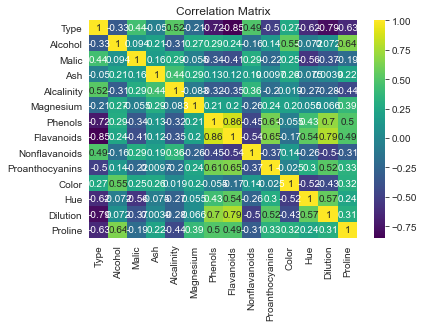

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
data = df.iloc[:,1:]
data_norm = scale(data)
pca = PCA(n_components=13)

In [9]:
data_pca = pca.fit_transform(data_norm)

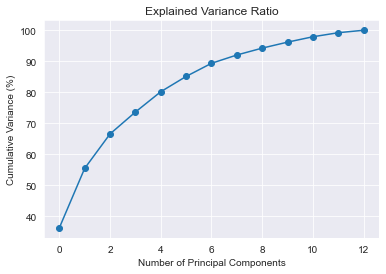

In [10]:
# Plot the explained variance ratio
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var, 4) * 100)
plt.plot(cum_var, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

In [11]:
# Choose a different number of principal components 
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_norm)

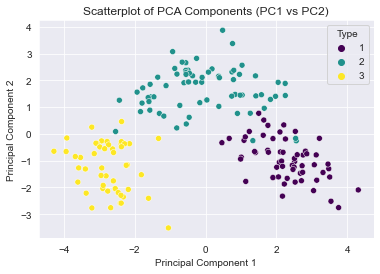

In [12]:
# Scatterplot for the first two principal components
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Type'], palette='viridis')
plt.title('Scatterplot of PCA Components (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

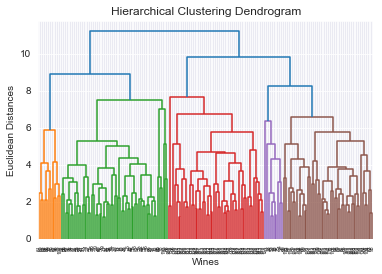

In [13]:
# Hierarchical Clustering Dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, 'complete'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean Distances')
plt.show()

In [14]:
# Hierarchical Clustering Scatterplot
hclusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hierarchical = pd.DataFrame(hclusters.fit_predict(data_norm), columns=['clustersid'])
y_hierarchical['clustersid'].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

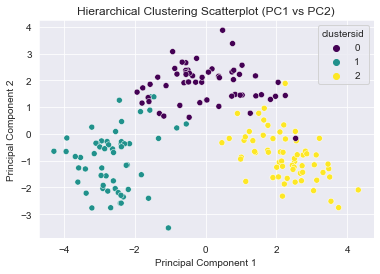

In [15]:
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=y_hierarchical['clustersid'], palette='viridis')
plt.title('Hierarchical Clustering Scatterplot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [16]:
# K-Means Elbow Graph
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

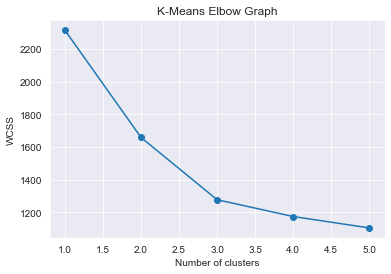

In [17]:
plt.plot(range(1, 6), wcss, marker='o')
plt.title('K-Means Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# K-Means Scatterplot
clusters_kmeans = KMeans(3, random_state=30).fit(data_norm)
new_df = df.copy()
new_df['clusters_kmeans'] = clusters_kmeans.labels_

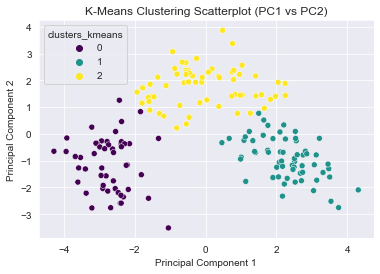

In [19]:
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=new_df['clusters_kmeans'], palette='viridis')
plt.title('K-Means Clustering Scatterplot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()